In [19]:
try:
    from bs4 import BeautifulSoup
    import pandas as pd
    print ("BeautifulSoup and Pandas are already installed and imported")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas as pd
    print ("BeautifulSoup and Pandas were not found. Installed them and imported")

import requests

BeautifulSoup and Pandas are already installed and imported


Importing Beautiful Soup, pandas

In [20]:
us_opened_webpage = requests.get("https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population")
print("Webpage opened")

us_bs = BeautifulSoup(us_opened_webpage.content, "html.parser")
print ("Webpage loaded and parsed successfully...")

Webpage opened
Webpage loaded and parsed successfully...


Getting the webpage, parsing the webpage

In [21]:
ustable = us_bs.find('table',{'class':"wikitable sortable"})
print(ustable)

<table class="wikitable sortable" style="text-align:center">
<tbody><tr>
<th scope="col">2021<br/>rank
</th>
<th scope="col">City
</th>
<th scope="col">State<sup class="reference" id="cite_ref-5"><a href="#cite_note-5">[c]</a></sup>
</th>
<th scope="col">2021<br/>estimate
</th>
<th scope="col">2020<br/>census
</th>
<th scope="col">Change
</th>
<th colspan="2" scope="col">2020 land area
</th>
<th colspan="2" scope="col">2020 population density
</th>
<th scope="col">Location
</th></tr>
<tr>
<th scope="row">1
</th>
<td style="text-align:left;background-color:#cfecec"><i><a href="/wiki/New_York_City" title="New York City">New York</a></i><sup class="reference" id="cite_ref-6"><a href="#cite_note-6">[d]</a></sup>
</td>
<td align="left"><a href="/wiki/New_York_(state)" title="New York (state)">New York</a>
</td>
<td style="text-align:right;">8,467,513
</td>
<td style="text-align:right;">8,804,190
</td>
<td style="text-align:right;"><span data-sort-value="2999618000000000000♠" style="display:

finding the correct table
printing the table to make sure it is the right one

In [22]:
us_df=pd.read_html(str(ustable))

us_df=pd.DataFrame(us_df[0])
us_df.head()

drop_us_df = us_df.drop(columns=["Location","2020 population density.1","2021estimate", "2020 land area.1"])
drop_us_df.head()

drop_us_df = drop_us_df.rename(columns={"2020 land area":"Area","2020census":"Population","State[c]":"State","2021rank":"Rank by Population","2020 population density":"Population Density"})

drop_us_df.to_csv("US Cities info.csv")

Reading the table with pandas
Printing a few rows
dropping unnecesary redundant columns
renaming columns
saving as a csv file

In [23]:
drop_us_df.head()

,Rank by Population,City,State,Population,Change,Area,Population Density
0,1,New York[d],New York,8804190,−3.82%,300.5 sq mi,"29,298/sq mi"
1,2,Los Angeles,California,3898747,−1.27%,469.5 sq mi,"8,304/sq mi"
2,3,Chicago,Illinois,2746388,−1.81%,227.7 sq mi,"12,061/sq mi"
3,4,Houston,Texas,2304580,−0.71%,640.4 sq mi,"3,599/sq mi"
4,5,Phoenix,Arizona,1608139,+1.02%,518.0 sq mi,"3,105/sq mi"


Making sure everyhting looks good by printing a few rows

In [24]:
column_names = drop_us_df.columns
print (column_names)

Index(['Rank by Population', 'City', 'State', 'Population', 'Change', 'Area',
       'Population Density'],
      dtype='object')


Ensuring column names are accurate

In [25]:
df = pd.read_csv("US Cities info.csv")
df.head(10)

,Unnamed: 0,Rank by Population,City,State,Population,Change,Area,Population Density
0,0,1,New York[d],New York,8804190,−3.82%,300.5 sq mi,"29,298/sq mi"
1,1,2,Los Angeles,California,3898747,−1.27%,469.5 sq mi,"8,304/sq mi"
2,2,3,Chicago,Illinois,2746388,−1.81%,227.7 sq mi,"12,061/sq mi"
3,3,4,Houston,Texas,2304580,−0.71%,640.4 sq mi,"3,599/sq mi"
4,4,5,Phoenix,Arizona,1608139,+1.02%,518.0 sq mi,"3,105/sq mi"
5,5,6,Philadelphia[e],Pennsylvania,1603797,−1.72%,134.4 sq mi,"11,933/sq mi"
6,6,7,San Antonio,Texas,1434625,+1.20%,498.8 sq mi,"2,876/sq mi"
7,7,8,San Diego,California,1386932,−0.38%,325.9 sq mi,"4,256/sq mi"
8,8,9,Dallas,Texas,1304379,−1.22%,339.6 sq mi,"3,841/sq mi"
9,9,10,San Jose,California,1013240,−2.94%,178.3 sq mi,"5,683/sq mi"


reads the files
prints the info
prints a few rows

In [26]:
try:
    import pandas as pd
    import numpy as np
    import scipy
    from matplotlib import pyplot as plt
    print ("Imported all libraries successfully...")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} numpy
    !conda install --yes --prefix {sys.prefix} pandas
    !conda install --yes --prefix {sys.prefix} matplotlib
    !conda install --yes --prefix {sys.prefix} scipy
    print ("Some libraries not found, installing...")

Imported all libraries successfully...


Importing necessary modules to create visualizations

In [27]:
area = df['Area']
density = df['Population Density']
population = df["Population"]
change = df['Change']
states = df['State']

str_states = []
for i in states:
    i = str(i)
    str_states.append(i)

float_area = []
for i in area:
    i = str(i)
    i = i.replace("\xa0sq\xa0mi","")
    i = i.replace(",","")
    i = float(i)
    float_area.append(i)

float_density = []
for i in density:
    i = str(i)
    i = i.replace("/sq\xa0mi","")
    i = i.replace(",","")
    i = float(i)
    float_density.append(i)

float_change = []
for i in change:
    i = str(i)
    i = i.replace("%","")
    i = i.replace("−","-")
    i = float(i)
    float_change.append(i)

float_population = []
for i in population:
    i = str(i)
    i = float(i)
    float_population.append(i)
print(float_population)

df["Population"] = float_population
df["Change"] = float_change
df["Area"] = float_area
df["Population Density"] = float_density
#df = df.drop(columns=["Unnamed: 0"])
df.head()

df.to_csv("Final_US_Cities_Info.csv")

[8804190.0, 3898747.0, 2746388.0, 2304580.0, 1608139.0, 1603797.0, 1434625.0, 1386932.0, 1304379.0, 1013240.0, 961855.0, 949611.0, 918915.0, 905748.0, 887642.0, 874579.0, 873965.0, 737015.0, 715522.0, 681054.0, 689447.0, 678815.0, 689545.0, 675647.0, 641903.0, 652503.0, 639111.0, 633045.0, 633104.0, 585708.0, 577222.0, 564559.0, 542107.0, 542629.0, 524943.0, 504258.0, 508090.0, 498715.0, 486051.0, 478961.0, 467665.0, 459470.0, 466742.0, 442241.0, 440646.0, 429954.0, 413066.0, 403455.0, 397532.0, 394266.0, 386261.0, 384959.0, 383997.0, 372624.0, 346824.0, 350964.0, 317610.0, 320804.0, 322570.0, 317863.0, 314998.0, 310227.0, 307573.0, 307670.0, 309317.0, 311549.0, 311527.0, 302971.0, 299035.0, 301578.0, 291082.0, 285494.0, 291247.0, 283506.0, 292449.0, 275987.0, 275487.0, 278349.0, 262527.0, 267918.0, 269840.0, 264165.0, 270871.0, 263886.0, 257141.0, 258308.0, 255205.0, 256684.0, 249422.0, 249545.0, 248325.0, 241361.0, 246018.0, 235684.0, 238005.0, 228989.0, 230504.0, 226610.0, 228673.0,

assigning names to the column lists
transforming the data by converting objects to strings
removing noise
converting numerical columns to floats so visualizations can be made
assigning new, cleaned lists to dataframe
saving to another final csv

In [28]:
df["Population"].describe()

count    3.310000e+02
mean     2.946417e+05
std      5.876452e+05
min      9.150200e+04
25%      1.167045e+05
50%      1.566070e+05
75%      2.632065e+05
max      8.804190e+06
Name: Population, dtype: float64

In [29]:
df["Area"].describe()

count     331.000000
mean       93.494864
std       134.483409
min         6.400000
25%        33.950000
50%        55.400000
75%       104.700000
max      1706.800000
Name: Area, dtype: float64

In [30]:
df["Population Density"].describe()

count      331.000000
mean      4184.027190
std       3365.976909
min        171.000000
25%       2235.500000
50%       3351.000000
75%       4762.500000
max      29298.000000
Name: Population Density, dtype: float64

Text(0.5, 1.0, '')

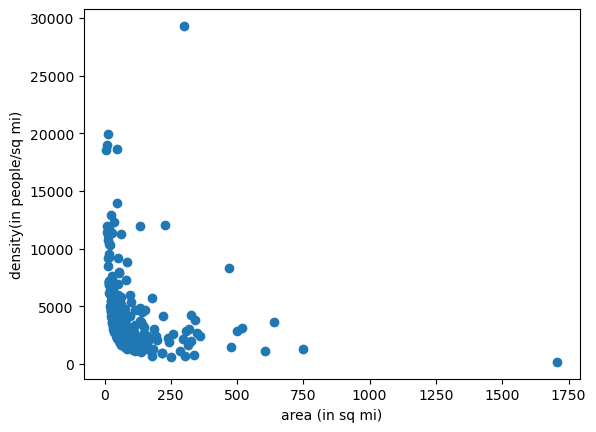

In [31]:
#data set columns are str_state, float_area, float_density, float_change, float_population

plt.scatter(float_area[0:300], float_density[0:300])
plt.xlabel("area (in sq mi)")
plt.ylabel("density(in people/sq mi)")
plt.title("")
